## Imports the libraries that we are going to use to preprocess and analyze our data.

In [168]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Load the datasets 

In [169]:
dataset = pd.read_csv('test_data.csv')


In [170]:
dataset2 = pd.read_csv('test_data.csv')


In [171]:
dataset1 = pd.read_csv('train_data.csv')

## Explore our datasets and see if we can find any patterns.

In [172]:
dataset1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [173]:
dataset2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15642544,Henderson,723,France,Male,34,5,0.00,2,0,1,12092.03
1,15779492,Trevisano,796,Spain,Male,56,6,94231.13,1,0,0,121164.60
2,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41
3,15582591,Chiabuotu,615,Spain,Male,59,4,155766.05,1,1,1,110275.17
4,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42



#### number of unique observations per column

In [174]:
dataset1.nunique()

CustomerId         7000
Surname            2424
CreditScore         455
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            4490
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    6999
Exited                2
dtype: int64

#### Total of  13 columns in our dataset. We need to drop columns that have no effect whether a customer exists or not.

## Surname and CustomerId are irrelevant to our dataset. We remove it by using the drop feature.

In [175]:
TestData = dataset2.drop(['Surname', 'CustomerId'], axis=1, inplace = True)

In [176]:
tempdata = dataset2.drop(['Geography', 'Gender'], axis=1)

In [177]:
Geography = pd.get_dummies(dataset2.Geography).iloc[:,1:]

Gender = pd.get_dummies(dataset2.Gender).iloc[:,1:]

In [178]:
TestData = pd.concat([tempdata,Geography,Gender], axis=1)

In [179]:
TestData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,723,34,5,0.00,2,0,1,12092.03,0,0,1
1,796,56,6,94231.13,1,0,0,121164.60,0,1,1
2,755,43,6,165048.50,3,1,0,16929.41,1,0,1
3,615,59,4,155766.05,1,1,1,110275.17,0,1,1
4,430,36,1,138992.48,2,0,0,122373.42,1,0,1


In [180]:
dataset1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [181]:
dataset1.drop(['CustomerId', 'Surname'], axis=1, inplace = True)

In [182]:
dataset1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


## To see the statistical details of the numeric columns in our dataset, we use describe

In [183]:
dataset1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.424000,38.932857,5.008143,77006.866360,1.525857,0.709286,0.514429,99783.685516,0.201429
std,97.478815,10.467815,2.891734,62392.609703,0.582318,0.454124,0.499827,57358.455381,0.401096
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50957.302500,0.000000
50%,651.000000,37.000000,5.000000,97529.180000,1.000000,1.000000,1.000000,99594.475000,0.000000
75%,716.000000,44.000000,7.000000,127942.495000,2.000000,1.000000,1.000000,149462.720000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199953.330000,1.000000


# Checking to see if Gender has any effect on whether a customer exists or not.

<AxesSubplot:xlabel='Gender'>

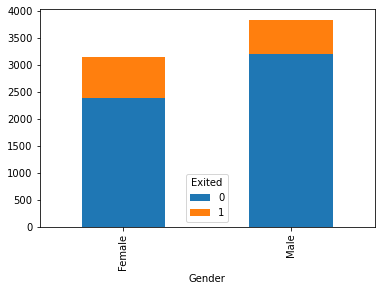

In [184]:
counts = dataset1.groupby(['Gender', 'Exited']).Exited.count().unstack()

counts.plot(kind='bar', stacked=True)

### The ratio of customers leaving among females is higher than the males.

### The relationship between the geography of the customer and the customer churn.

<AxesSubplot:xlabel='Geography'>

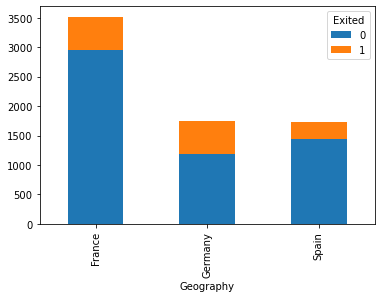

In [185]:
counts = dataset1.groupby(['Geography', 'Exited']).Exited.count().unstack()

counts.plot(kind='bar', stacked=True)

#### the ratio of customer churn is highest among the German customers while lower among the French customers.

## categorical columns are Geography and Gender
### We convert categorical data into numerical data using one-hot encoding scheme. 

In [186]:
tempdata = dataset1.drop(['Geography', 'Gender'], axis=1)

In [187]:
Geography = pd.get_dummies(dataset1.Geography).iloc[:,1:]

Gender = pd.get_dummies(dataset1.Gender).iloc[:,1:]


In [188]:
dataset1 = pd.concat([tempdata,Geography,Gender], axis=1)

In [189]:
dataset1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,601,41,1,0.00,2,0,1,160607.06,0,0,0,0
1,576,39,1,0.00,2,1,1,68814.23,0,0,0,1
2,728,69,1,0.00,2,1,1,131804.86,0,0,0,0
3,640,39,3,0.00,1,1,1,105997.25,0,0,1,1
4,768,37,9,108308.11,1,1,0,41788.25,1,1,0,1


In [190]:
# Find correlations with the target and sort
correlations = dataset1.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 EstimatedSalary    0.016426
Balance            0.111493
Germany            0.170520
Age                0.288732
Exited             1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.167725
Male             -0.101712
Spain            -0.054422
NumOfProducts    -0.040043
CreditScore      -0.032201
Name: Exited, dtype: float64


### The strongest positive correlations with the target features are: EstimatedSalary, Balance, Age .
### The strongest negative correlations with the target features are: IsActiveMember, NumOfProducts, Tenure, HasCrCard *, and *CreditScore . 

#### Dividing Data into Training and Test Sets

In [191]:
dataset_features = dataset1.drop(['Exited'], axis=1)

dataset_labels = dataset1['Exited']

In [192]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21)

In [193]:
test_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
1710,639,35,8,0.00,1,0,0,164453.98,0,0,0
3776,719,35,8,0.00,1,1,1,165162.40,0,1,0
5647,613,24,7,140453.91,1,1,0,129001.30,0,0,0
2318,837,49,8,103302.37,1,1,1,50974.57,0,0,1
6490,601,44,4,0.00,2,1,0,58561.31,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
166,592,41,2,138734.94,1,1,0,90020.74,0,1,0
1943,644,18,8,0.00,2,1,0,59172.42,0,1,1
1139,461,51,9,119889.84,1,0,0,56767.67,0,0,1
3259,565,55,4,118803.35,2,1,1,128124.70,0,0,1


### Training and Evaluation of Machine Learning Models

##### Random Forest Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc_object = rfc(n_estimators=200, random_state=0)

rfc_object.fit(train_features, train_labels)

predicted_labels = rfc_object.predict(TestData)

In [195]:
dic = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels}

In [196]:
Result = pd.DataFrame(dic)
Result.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [197]:
Result.to_csv('final.csv', index=False)

##### Cat Boost Classifier

In [198]:
from catboost import CatBoostClassifier as bfc

## Tune the Hyperparameters for Better Performance

In [199]:
#import libraries
from sklearn import datasets
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

#Instantiate CatBoostClassifier
cbc = CatBoostClassifier()

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(dataset_features,dataset_labels)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

Learning rate set to 0.177587
0:	learn: 0.6170029	total: 1.11ms	remaining: 110ms
1:	learn: 0.5565699	total: 2.1ms	remaining: 103ms
2:	learn: 0.5121836	total: 3.35ms	remaining: 108ms
3:	learn: 0.4801770	total: 4.49ms	remaining: 108ms
4:	learn: 0.4575562	total: 5.38ms	remaining: 102ms
5:	learn: 0.4429686	total: 6.24ms	remaining: 97.8ms
6:	learn: 0.4243777	total: 7.22ms	remaining: 95.9ms
7:	learn: 0.4113417	total: 8.19ms	remaining: 94.2ms
8:	learn: 0.4026335	total: 9.63ms	remaining: 97.4ms
9:	learn: 0.3937520	total: 11.1ms	remaining: 99.8ms
10:	learn: 0.3864840	total: 12.1ms	remaining: 98ms
11:	learn: 0.3801021	total: 13.2ms	remaining: 96.7ms
12:	learn: 0.3749575	total: 14.4ms	remaining: 96.1ms
13:	learn: 0.3710463	total: 15.7ms	remaining: 96.3ms
14:	learn: 0.3672247	total: 17.1ms	remaining: 96.7ms
15:	learn: 0.3636161	total: 18.3ms	remaining: 96.2ms
16:	learn: 0.3608457	total: 19.5ms	remaining: 95.2ms
17:	learn: 0.3590979	total: 20.7ms	remaining: 94.5ms
18:	learn: 0.3572240	total: 21.8ms

Learning rate set to 0.177587
0:	learn: 0.6121186	total: 752us	remaining: 74.5ms
1:	learn: 0.5589116	total: 1.56ms	remaining: 76.5ms
2:	learn: 0.5141987	total: 2.39ms	remaining: 77.4ms
3:	learn: 0.4817696	total: 3.18ms	remaining: 76.3ms
4:	learn: 0.4596198	total: 4.05ms	remaining: 77ms
5:	learn: 0.4402429	total: 4.9ms	remaining: 76.7ms
6:	learn: 0.4245630	total: 5.71ms	remaining: 75.8ms
7:	learn: 0.4109894	total: 6.54ms	remaining: 75.3ms
8:	learn: 0.4031056	total: 7.38ms	remaining: 74.6ms
9:	learn: 0.3943054	total: 8.33ms	remaining: 75ms
10:	learn: 0.3865565	total: 9.19ms	remaining: 74.4ms
11:	learn: 0.3812371	total: 10.1ms	remaining: 73.8ms
12:	learn: 0.3752607	total: 11ms	remaining: 73.6ms
13:	learn: 0.3716363	total: 12ms	remaining: 73.6ms
14:	learn: 0.3674452	total: 12.9ms	remaining: 73.1ms
15:	learn: 0.3641841	total: 13.8ms	remaining: 72.4ms
16:	learn: 0.3609118	total: 14.8ms	remaining: 72.3ms
17:	learn: 0.3593226	total: 15.8ms	remaining: 72.1ms
18:	learn: 0.3571964	total: 16.7ms	r

82:	learn: 0.3143998	total: 79.3ms	remaining: 16.2ms
83:	learn: 0.3141513	total: 80.3ms	remaining: 15.3ms
84:	learn: 0.3139156	total: 81.3ms	remaining: 14.3ms
85:	learn: 0.3132339	total: 82.3ms	remaining: 13.4ms
86:	learn: 0.3129270	total: 83.3ms	remaining: 12.4ms
87:	learn: 0.3128516	total: 84.2ms	remaining: 11.5ms
88:	learn: 0.3123330	total: 85.2ms	remaining: 10.5ms
89:	learn: 0.3122253	total: 86.5ms	remaining: 9.61ms
90:	learn: 0.3121522	total: 87.5ms	remaining: 8.65ms
91:	learn: 0.3117562	total: 88.3ms	remaining: 7.68ms
92:	learn: 0.3115078	total: 89.2ms	remaining: 6.72ms
93:	learn: 0.3113387	total: 90.1ms	remaining: 5.75ms
94:	learn: 0.3112429	total: 91.2ms	remaining: 4.8ms
95:	learn: 0.3109634	total: 92.3ms	remaining: 3.85ms
96:	learn: 0.3105680	total: 93.4ms	remaining: 2.89ms
97:	learn: 0.3103330	total: 94.4ms	remaining: 1.93ms
98:	learn: 0.3102306	total: 95.6ms	remaining: 965us
99:	learn: 0.3100536	total: 96.8ms	remaining: 0us
Learning rate set to 0.094052
0:	learn: 0.6368428	t

Learning rate set to 0.094052
0:	learn: 0.6377146	total: 1.65ms	remaining: 329ms
1:	learn: 0.5814100	total: 3.15ms	remaining: 312ms
2:	learn: 0.5463195	total: 4.89ms	remaining: 321ms
3:	learn: 0.5106639	total: 6.47ms	remaining: 317ms
4:	learn: 0.4825536	total: 8.05ms	remaining: 314ms
5:	learn: 0.4596220	total: 9.59ms	remaining: 310ms
6:	learn: 0.4428332	total: 11.5ms	remaining: 316ms
7:	learn: 0.4299010	total: 13.4ms	remaining: 322ms
8:	learn: 0.4181687	total: 15ms	remaining: 318ms
9:	learn: 0.4084543	total: 16.6ms	remaining: 316ms
10:	learn: 0.4001701	total: 18.5ms	remaining: 317ms
11:	learn: 0.3929131	total: 20.4ms	remaining: 319ms
12:	learn: 0.3869351	total: 22.1ms	remaining: 318ms
13:	learn: 0.3819135	total: 23.7ms	remaining: 315ms
14:	learn: 0.3772297	total: 25.2ms	remaining: 311ms
15:	learn: 0.3728377	total: 26.8ms	remaining: 308ms
16:	learn: 0.3702669	total: 28.3ms	remaining: 305ms
17:	learn: 0.3670694	total: 29.9ms	remaining: 303ms
18:	learn: 0.3640762	total: 31.5ms	remaining: 

22:	learn: 0.3526593	total: 43.1ms	remaining: 332ms
23:	learn: 0.3510144	total: 45ms	remaining: 330ms
24:	learn: 0.3494454	total: 47.1ms	remaining: 330ms
25:	learn: 0.3474958	total: 49ms	remaining: 328ms
26:	learn: 0.3463851	total: 50.9ms	remaining: 326ms
27:	learn: 0.3449049	total: 52.6ms	remaining: 323ms
28:	learn: 0.3435505	total: 54.7ms	remaining: 323ms
29:	learn: 0.3425111	total: 56.7ms	remaining: 321ms
30:	learn: 0.3416716	total: 59.1ms	remaining: 322ms
31:	learn: 0.3404876	total: 61ms	remaining: 320ms
32:	learn: 0.3397953	total: 62.9ms	remaining: 318ms
33:	learn: 0.3389334	total: 64.8ms	remaining: 316ms
34:	learn: 0.3383654	total: 66.6ms	remaining: 314ms
35:	learn: 0.3369755	total: 68.3ms	remaining: 311ms
36:	learn: 0.3361640	total: 70.2ms	remaining: 309ms
37:	learn: 0.3357062	total: 72ms	remaining: 307ms
38:	learn: 0.3351007	total: 73.8ms	remaining: 305ms
39:	learn: 0.3340692	total: 75.5ms	remaining: 302ms
40:	learn: 0.3334348	total: 77.2ms	remaining: 300ms
41:	learn: 0.3322708

37:	learn: 0.3443848	total: 60.7ms	remaining: 259ms
38:	learn: 0.3433474	total: 62.5ms	remaining: 258ms
39:	learn: 0.3428527	total: 64ms	remaining: 256ms
40:	learn: 0.3416443	total: 65.5ms	remaining: 254ms
41:	learn: 0.3411864	total: 67.1ms	remaining: 252ms
42:	learn: 0.3407456	total: 68.6ms	remaining: 251ms
43:	learn: 0.3399801	total: 70.2ms	remaining: 249ms
44:	learn: 0.3396727	total: 71.7ms	remaining: 247ms
45:	learn: 0.3387540	total: 73.4ms	remaining: 246ms
46:	learn: 0.3379733	total: 74.9ms	remaining: 244ms
47:	learn: 0.3375926	total: 76.8ms	remaining: 243ms
48:	learn: 0.3371137	total: 78.6ms	remaining: 242ms
49:	learn: 0.3367359	total: 80.3ms	remaining: 241ms
50:	learn: 0.3363276	total: 81.8ms	remaining: 239ms
51:	learn: 0.3347587	total: 83.6ms	remaining: 238ms
52:	learn: 0.3344192	total: 85.4ms	remaining: 237ms
53:	learn: 0.3336487	total: 87.1ms	remaining: 236ms
54:	learn: 0.3332149	total: 88.8ms	remaining: 234ms
55:	learn: 0.3328854	total: 90.7ms	remaining: 233ms
56:	learn: 0.3

41:	learn: 0.3356776	total: 81ms	remaining: 305ms
42:	learn: 0.3352485	total: 83ms	remaining: 303ms
43:	learn: 0.3349451	total: 84.9ms	remaining: 301ms
44:	learn: 0.3342854	total: 86.7ms	remaining: 299ms
45:	learn: 0.3339167	total: 88.6ms	remaining: 297ms
46:	learn: 0.3335368	total: 90.6ms	remaining: 295ms
47:	learn: 0.3326646	total: 92.6ms	remaining: 293ms
48:	learn: 0.3319832	total: 94.8ms	remaining: 292ms
49:	learn: 0.3316376	total: 96.5ms	remaining: 290ms
50:	learn: 0.3310737	total: 98.1ms	remaining: 287ms
51:	learn: 0.3307729	total: 100ms	remaining: 285ms
52:	learn: 0.3305609	total: 102ms	remaining: 283ms
53:	learn: 0.3301697	total: 104ms	remaining: 282ms
54:	learn: 0.3290052	total: 106ms	remaining: 280ms
55:	learn: 0.3283223	total: 108ms	remaining: 279ms
56:	learn: 0.3280352	total: 111ms	remaining: 277ms
57:	learn: 0.3275658	total: 113ms	remaining: 276ms
58:	learn: 0.3271657	total: 114ms	remaining: 274ms
59:	learn: 0.3268352	total: 116ms	remaining: 271ms
60:	learn: 0.3258324	tota

49:	learn: 0.3446424	total: 77.4ms	remaining: 387ms
50:	learn: 0.3441934	total: 79.2ms	remaining: 387ms
51:	learn: 0.3437227	total: 80.7ms	remaining: 385ms
52:	learn: 0.3434103	total: 82.4ms	remaining: 384ms
53:	learn: 0.3426662	total: 84.1ms	remaining: 383ms
54:	learn: 0.3422182	total: 85.5ms	remaining: 381ms
55:	learn: 0.3418404	total: 87.2ms	remaining: 380ms
56:	learn: 0.3413949	total: 88.9ms	remaining: 379ms
57:	learn: 0.3407380	total: 90.4ms	remaining: 377ms
58:	learn: 0.3403038	total: 92.2ms	remaining: 377ms
59:	learn: 0.3399736	total: 94ms	remaining: 376ms
60:	learn: 0.3396933	total: 95.7ms	remaining: 375ms
61:	learn: 0.3390293	total: 97.2ms	remaining: 373ms
62:	learn: 0.3385262	total: 98.9ms	remaining: 372ms
63:	learn: 0.3380337	total: 101ms	remaining: 371ms
64:	learn: 0.3377150	total: 102ms	remaining: 369ms
65:	learn: 0.3375017	total: 104ms	remaining: 368ms
66:	learn: 0.3370759	total: 105ms	remaining: 366ms
67:	learn: 0.3366950	total: 107ms	remaining: 365ms
68:	learn: 0.336425

277:	learn: 0.2977697	total: 460ms	remaining: 36.4ms
278:	learn: 0.2976071	total: 463ms	remaining: 34.8ms
279:	learn: 0.2975010	total: 464ms	remaining: 33.2ms
280:	learn: 0.2974404	total: 466ms	remaining: 31.5ms
281:	learn: 0.2972959	total: 468ms	remaining: 29.8ms
282:	learn: 0.2971493	total: 469ms	remaining: 28.2ms
283:	learn: 0.2970261	total: 471ms	remaining: 26.5ms
284:	learn: 0.2969360	total: 473ms	remaining: 24.9ms
285:	learn: 0.2967462	total: 474ms	remaining: 23.2ms
286:	learn: 0.2964843	total: 476ms	remaining: 21.6ms
287:	learn: 0.2964419	total: 478ms	remaining: 19.9ms
288:	learn: 0.2962905	total: 480ms	remaining: 18.3ms
289:	learn: 0.2961174	total: 481ms	remaining: 16.6ms
290:	learn: 0.2960019	total: 483ms	remaining: 14.9ms
291:	learn: 0.2958863	total: 485ms	remaining: 13.3ms
292:	learn: 0.2958298	total: 487ms	remaining: 11.6ms
293:	learn: 0.2956772	total: 489ms	remaining: 9.98ms
294:	learn: 0.2955400	total: 491ms	remaining: 8.32ms
295:	learn: 0.2954412	total: 493ms	remaining: 

199:	learn: 0.3052339	total: 331ms	remaining: 166ms
200:	learn: 0.3050547	total: 333ms	remaining: 164ms
201:	learn: 0.3049132	total: 335ms	remaining: 162ms
202:	learn: 0.3047668	total: 336ms	remaining: 161ms
203:	learn: 0.3046163	total: 338ms	remaining: 159ms
204:	learn: 0.3045265	total: 340ms	remaining: 158ms
205:	learn: 0.3043777	total: 342ms	remaining: 156ms
206:	learn: 0.3043008	total: 343ms	remaining: 154ms
207:	learn: 0.3041947	total: 345ms	remaining: 153ms
208:	learn: 0.3040695	total: 347ms	remaining: 151ms
209:	learn: 0.3039204	total: 349ms	remaining: 149ms
210:	learn: 0.3037392	total: 350ms	remaining: 148ms
211:	learn: 0.3035925	total: 352ms	remaining: 146ms
212:	learn: 0.3034805	total: 354ms	remaining: 144ms
213:	learn: 0.3033525	total: 355ms	remaining: 143ms
214:	learn: 0.3032246	total: 357ms	remaining: 141ms
215:	learn: 0.3030287	total: 359ms	remaining: 140ms
216:	learn: 0.3029637	total: 361ms	remaining: 138ms
217:	learn: 0.3027712	total: 362ms	remaining: 136ms
218:	learn: 

123:	learn: 0.3147262	total: 200ms	remaining: 285ms
124:	learn: 0.3145743	total: 202ms	remaining: 283ms
125:	learn: 0.3141426	total: 204ms	remaining: 281ms
126:	learn: 0.3140489	total: 205ms	remaining: 279ms
127:	learn: 0.3136383	total: 207ms	remaining: 278ms
128:	learn: 0.3135630	total: 208ms	remaining: 276ms
129:	learn: 0.3134095	total: 210ms	remaining: 275ms
130:	learn: 0.3132603	total: 212ms	remaining: 273ms
131:	learn: 0.3131145	total: 213ms	remaining: 272ms
132:	learn: 0.3127108	total: 215ms	remaining: 270ms
133:	learn: 0.3125223	total: 217ms	remaining: 269ms
134:	learn: 0.3124300	total: 219ms	remaining: 267ms
135:	learn: 0.3122766	total: 220ms	remaining: 266ms
136:	learn: 0.3121516	total: 222ms	remaining: 264ms
137:	learn: 0.3120203	total: 224ms	remaining: 262ms
138:	learn: 0.3119220	total: 225ms	remaining: 261ms
139:	learn: 0.3117424	total: 227ms	remaining: 260ms
140:	learn: 0.3114207	total: 229ms	remaining: 258ms
141:	learn: 0.3112285	total: 231ms	remaining: 257ms
142:	learn: 

53:	learn: 0.3417969	total: 85.2ms	remaining: 388ms
54:	learn: 0.3413690	total: 86.8ms	remaining: 387ms
55:	learn: 0.3410137	total: 88.4ms	remaining: 385ms
56:	learn: 0.3405904	total: 90.1ms	remaining: 384ms
57:	learn: 0.3401653	total: 92.1ms	remaining: 384ms
58:	learn: 0.3393730	total: 93.7ms	remaining: 383ms
59:	learn: 0.3387148	total: 95.5ms	remaining: 382ms
60:	learn: 0.3384019	total: 97.4ms	remaining: 381ms
61:	learn: 0.3377608	total: 99ms	remaining: 380ms
62:	learn: 0.3373630	total: 100ms	remaining: 378ms
63:	learn: 0.3370189	total: 102ms	remaining: 376ms
64:	learn: 0.3367966	total: 104ms	remaining: 375ms
65:	learn: 0.3363772	total: 106ms	remaining: 374ms
66:	learn: 0.3357871	total: 107ms	remaining: 374ms
67:	learn: 0.3355139	total: 109ms	remaining: 373ms
68:	learn: 0.3350697	total: 111ms	remaining: 371ms
69:	learn: 0.3348724	total: 112ms	remaining: 369ms
70:	learn: 0.3343153	total: 114ms	remaining: 368ms
71:	learn: 0.3340153	total: 116ms	remaining: 366ms
72:	learn: 0.3337588	tot

286:	learn: 0.2964570	total: 470ms	remaining: 21.3ms
287:	learn: 0.2963494	total: 472ms	remaining: 19.7ms
288:	learn: 0.2962125	total: 473ms	remaining: 18ms
289:	learn: 0.2959992	total: 475ms	remaining: 16.4ms
290:	learn: 0.2958583	total: 477ms	remaining: 14.7ms
291:	learn: 0.2957921	total: 478ms	remaining: 13.1ms
292:	learn: 0.2956689	total: 480ms	remaining: 11.5ms
293:	learn: 0.2955840	total: 481ms	remaining: 9.82ms
294:	learn: 0.2954524	total: 483ms	remaining: 8.19ms
295:	learn: 0.2953641	total: 485ms	remaining: 6.55ms
296:	learn: 0.2952331	total: 487ms	remaining: 4.92ms
297:	learn: 0.2951493	total: 488ms	remaining: 3.28ms
298:	learn: 0.2950338	total: 490ms	remaining: 1.64ms
299:	learn: 0.2949441	total: 492ms	remaining: 0us
Learning rate set to 0.064847
0:	learn: 0.6481896	total: 1.66ms	remaining: 496ms
1:	learn: 0.6107529	total: 3.21ms	remaining: 478ms
2:	learn: 0.5807973	total: 4.74ms	remaining: 469ms
3:	learn: 0.5543207	total: 6.14ms	remaining: 454ms
4:	learn: 0.5303304	total: 7.

217:	learn: 0.3012525	total: 351ms	remaining: 132ms
218:	learn: 0.3011088	total: 354ms	remaining: 131ms
219:	learn: 0.3010153	total: 355ms	remaining: 129ms
220:	learn: 0.3008814	total: 357ms	remaining: 128ms
221:	learn: 0.3007867	total: 358ms	remaining: 126ms
222:	learn: 0.3006237	total: 360ms	remaining: 124ms
223:	learn: 0.3005280	total: 362ms	remaining: 123ms
224:	learn: 0.3004308	total: 363ms	remaining: 121ms
225:	learn: 0.3002823	total: 365ms	remaining: 119ms
226:	learn: 0.3002084	total: 367ms	remaining: 118ms
227:	learn: 0.3000986	total: 369ms	remaining: 117ms
228:	learn: 0.2999419	total: 371ms	remaining: 115ms
229:	learn: 0.2998565	total: 372ms	remaining: 113ms
230:	learn: 0.2996771	total: 374ms	remaining: 112ms
231:	learn: 0.2995201	total: 375ms	remaining: 110ms
232:	learn: 0.2994196	total: 377ms	remaining: 108ms
233:	learn: 0.2993629	total: 379ms	remaining: 107ms
234:	learn: 0.2992417	total: 380ms	remaining: 105ms
235:	learn: 0.2990862	total: 382ms	remaining: 104ms
236:	learn: 

99:	learn: 0.2969429	total: 117ms	remaining: 0us
Learning rate set to 0.177587
0:	learn: 0.6104881	total: 1.24ms	remaining: 123ms
1:	learn: 0.5504585	total: 2.42ms	remaining: 119ms
2:	learn: 0.5027681	total: 3.85ms	remaining: 124ms
3:	learn: 0.4679635	total: 5.27ms	remaining: 126ms
4:	learn: 0.4435766	total: 6.39ms	remaining: 121ms
5:	learn: 0.4224887	total: 8.02ms	remaining: 126ms
6:	learn: 0.4092026	total: 9.6ms	remaining: 128ms
7:	learn: 0.3948019	total: 10.9ms	remaining: 126ms
8:	learn: 0.3831071	total: 12.3ms	remaining: 124ms
9:	learn: 0.3753722	total: 13.5ms	remaining: 122ms
10:	learn: 0.3706509	total: 15ms	remaining: 121ms
11:	learn: 0.3649625	total: 16.5ms	remaining: 121ms
12:	learn: 0.3603971	total: 18.4ms	remaining: 123ms
13:	learn: 0.3560611	total: 19.8ms	remaining: 122ms
14:	learn: 0.3502698	total: 21.2ms	remaining: 120ms
15:	learn: 0.3471279	total: 22.4ms	remaining: 118ms
16:	learn: 0.3444861	total: 24ms	remaining: 117ms
17:	learn: 0.3411741	total: 25.3ms	remaining: 115ms


62:	learn: 0.3108901	total: 67.2ms	remaining: 39.5ms
63:	learn: 0.3103038	total: 68.2ms	remaining: 38.4ms
64:	learn: 0.3100337	total: 69.5ms	remaining: 37.4ms
65:	learn: 0.3099454	total: 70.5ms	remaining: 36.3ms
66:	learn: 0.3096078	total: 71.5ms	remaining: 35.2ms
67:	learn: 0.3092367	total: 72.5ms	remaining: 34.1ms
68:	learn: 0.3090777	total: 73.4ms	remaining: 33ms
69:	learn: 0.3088782	total: 74.4ms	remaining: 31.9ms
70:	learn: 0.3082384	total: 75.4ms	remaining: 30.8ms
71:	learn: 0.3080294	total: 76.5ms	remaining: 29.7ms
72:	learn: 0.3075220	total: 77.5ms	remaining: 28.7ms
73:	learn: 0.3071813	total: 78.7ms	remaining: 27.6ms
74:	learn: 0.3070437	total: 80.1ms	remaining: 26.7ms
75:	learn: 0.3067214	total: 81.3ms	remaining: 25.7ms
76:	learn: 0.3063213	total: 82.3ms	remaining: 24.6ms
77:	learn: 0.3062101	total: 83.4ms	remaining: 23.5ms
78:	learn: 0.3061477	total: 84.6ms	remaining: 22.5ms
79:	learn: 0.3059072	total: 85.9ms	remaining: 21.5ms
80:	learn: 0.3056243	total: 86.9ms	remaining: 20

174:	learn: 0.2826926	total: 332ms	remaining: 47.5ms
175:	learn: 0.2823408	total: 334ms	remaining: 45.6ms
176:	learn: 0.2819011	total: 336ms	remaining: 43.6ms
177:	learn: 0.2816084	total: 338ms	remaining: 41.7ms
178:	learn: 0.2813631	total: 339ms	remaining: 39.8ms
179:	learn: 0.2811905	total: 341ms	remaining: 37.9ms
180:	learn: 0.2810001	total: 343ms	remaining: 36ms
181:	learn: 0.2807718	total: 345ms	remaining: 34.2ms
182:	learn: 0.2805699	total: 347ms	remaining: 32.3ms
183:	learn: 0.2804297	total: 350ms	remaining: 30.4ms
184:	learn: 0.2802328	total: 351ms	remaining: 28.5ms
185:	learn: 0.2800162	total: 353ms	remaining: 26.6ms
186:	learn: 0.2797171	total: 355ms	remaining: 24.7ms
187:	learn: 0.2795491	total: 358ms	remaining: 22.8ms
188:	learn: 0.2793548	total: 360ms	remaining: 20.9ms
189:	learn: 0.2791461	total: 362ms	remaining: 19ms
190:	learn: 0.2788397	total: 363ms	remaining: 17.1ms
191:	learn: 0.2785828	total: 365ms	remaining: 15.2ms
192:	learn: 0.2783120	total: 367ms	remaining: 13.3

184:	learn: 0.2781132	total: 327ms	remaining: 26.5ms
185:	learn: 0.2778118	total: 329ms	remaining: 24.8ms
186:	learn: 0.2775525	total: 331ms	remaining: 23ms
187:	learn: 0.2772872	total: 333ms	remaining: 21.3ms
188:	learn: 0.2771470	total: 335ms	remaining: 19.5ms
189:	learn: 0.2770638	total: 337ms	remaining: 17.7ms
190:	learn: 0.2766513	total: 338ms	remaining: 15.9ms
191:	learn: 0.2764464	total: 340ms	remaining: 14.2ms
192:	learn: 0.2761816	total: 342ms	remaining: 12.4ms
193:	learn: 0.2759947	total: 344ms	remaining: 10.6ms
194:	learn: 0.2756228	total: 346ms	remaining: 8.88ms
195:	learn: 0.2754447	total: 348ms	remaining: 7.11ms
196:	learn: 0.2751323	total: 351ms	remaining: 5.34ms
197:	learn: 0.2749174	total: 352ms	remaining: 3.56ms
198:	learn: 0.2747581	total: 354ms	remaining: 1.78ms
199:	learn: 0.2745990	total: 356ms	remaining: 0us
Learning rate set to 0.094052
0:	learn: 0.6285444	total: 1.68ms	remaining: 334ms
1:	learn: 0.5770103	total: 3.33ms	remaining: 330ms
2:	learn: 0.5295735	total

192:	learn: 0.2759255	total: 347ms	remaining: 12.6ms
193:	learn: 0.2756548	total: 349ms	remaining: 10.8ms
194:	learn: 0.2754354	total: 351ms	remaining: 8.99ms
195:	learn: 0.2753490	total: 353ms	remaining: 7.19ms
196:	learn: 0.2750302	total: 354ms	remaining: 5.39ms
197:	learn: 0.2747866	total: 356ms	remaining: 3.6ms
198:	learn: 0.2745102	total: 358ms	remaining: 1.8ms
199:	learn: 0.2742223	total: 360ms	remaining: 0us
Learning rate set to 0.094052
0:	learn: 0.6305821	total: 1.65ms	remaining: 329ms
1:	learn: 0.5803985	total: 3.7ms	remaining: 367ms
2:	learn: 0.5332248	total: 6.25ms	remaining: 411ms
3:	learn: 0.5022535	total: 8.47ms	remaining: 415ms
4:	learn: 0.4741728	total: 10.4ms	remaining: 405ms
5:	learn: 0.4499060	total: 12.1ms	remaining: 391ms
6:	learn: 0.4324488	total: 13.8ms	remaining: 382ms
7:	learn: 0.4220004	total: 15.5ms	remaining: 373ms
8:	learn: 0.4100140	total: 17.3ms	remaining: 367ms
9:	learn: 0.4014098	total: 19.1ms	remaining: 364ms
10:	learn: 0.3913404	total: 21ms	remaining

186:	learn: 0.2800451	total: 354ms	remaining: 24.6ms
187:	learn: 0.2795503	total: 357ms	remaining: 22.8ms
188:	learn: 0.2792924	total: 359ms	remaining: 20.9ms
189:	learn: 0.2791531	total: 361ms	remaining: 19ms
190:	learn: 0.2788894	total: 363ms	remaining: 17.1ms
191:	learn: 0.2787902	total: 365ms	remaining: 15.2ms
192:	learn: 0.2785273	total: 368ms	remaining: 13.3ms
193:	learn: 0.2781921	total: 370ms	remaining: 11.4ms
194:	learn: 0.2778622	total: 372ms	remaining: 9.54ms
195:	learn: 0.2776572	total: 374ms	remaining: 7.64ms
196:	learn: 0.2773744	total: 376ms	remaining: 5.73ms
197:	learn: 0.2772017	total: 379ms	remaining: 3.82ms
198:	learn: 0.2768407	total: 381ms	remaining: 1.91ms
199:	learn: 0.2766368	total: 383ms	remaining: 0us
Learning rate set to 0.094052
0:	learn: 0.6291559	total: 2.01ms	remaining: 400ms
1:	learn: 0.5780967	total: 4.61ms	remaining: 456ms
2:	learn: 0.5307153	total: 6.79ms	remaining: 446ms
3:	learn: 0.4994817	total: 8.95ms	remaining: 438ms
4:	learn: 0.4708932	total: 11

165:	learn: 0.2831633	total: 344ms	remaining: 70.5ms
166:	learn: 0.2829164	total: 346ms	remaining: 68.3ms
167:	learn: 0.2826747	total: 348ms	remaining: 66.2ms
168:	learn: 0.2825346	total: 350ms	remaining: 64.2ms
169:	learn: 0.2823306	total: 352ms	remaining: 62.2ms
170:	learn: 0.2819852	total: 354ms	remaining: 60.1ms
171:	learn: 0.2817205	total: 357ms	remaining: 58ms
172:	learn: 0.2814480	total: 359ms	remaining: 56ms
173:	learn: 0.2810620	total: 361ms	remaining: 54ms
174:	learn: 0.2807616	total: 363ms	remaining: 51.9ms
175:	learn: 0.2806393	total: 365ms	remaining: 49.8ms
176:	learn: 0.2803024	total: 367ms	remaining: 47.7ms
177:	learn: 0.2801884	total: 369ms	remaining: 45.6ms
178:	learn: 0.2799263	total: 371ms	remaining: 43.5ms
179:	learn: 0.2797591	total: 373ms	remaining: 41.5ms
180:	learn: 0.2794990	total: 375ms	remaining: 39.4ms
181:	learn: 0.2791925	total: 377ms	remaining: 37.3ms
182:	learn: 0.2790827	total: 378ms	remaining: 35.2ms
183:	learn: 0.2787593	total: 380ms	remaining: 33.1ms

172:	learn: 0.2992993	total: 302ms	remaining: 222ms
173:	learn: 0.2992056	total: 305ms	remaining: 221ms
174:	learn: 0.2989615	total: 306ms	remaining: 219ms
175:	learn: 0.2986624	total: 309ms	remaining: 217ms
176:	learn: 0.2984788	total: 310ms	remaining: 216ms
177:	learn: 0.2982575	total: 312ms	remaining: 214ms
178:	learn: 0.2980867	total: 315ms	remaining: 213ms
179:	learn: 0.2977804	total: 317ms	remaining: 211ms
180:	learn: 0.2975633	total: 319ms	remaining: 210ms
181:	learn: 0.2972511	total: 321ms	remaining: 208ms
182:	learn: 0.2970674	total: 323ms	remaining: 207ms
183:	learn: 0.2968098	total: 325ms	remaining: 205ms
184:	learn: 0.2966825	total: 327ms	remaining: 204ms
185:	learn: 0.2965040	total: 330ms	remaining: 202ms
186:	learn: 0.2962949	total: 332ms	remaining: 201ms
187:	learn: 0.2960088	total: 334ms	remaining: 199ms
188:	learn: 0.2958944	total: 337ms	remaining: 198ms
189:	learn: 0.2957406	total: 339ms	remaining: 196ms
190:	learn: 0.2955483	total: 341ms	remaining: 195ms
191:	learn: 

46:	learn: 0.3305306	total: 95.4ms	remaining: 513ms
47:	learn: 0.3301704	total: 97.4ms	remaining: 511ms
48:	learn: 0.3294127	total: 99.2ms	remaining: 508ms
49:	learn: 0.3281049	total: 101ms	remaining: 506ms
50:	learn: 0.3277961	total: 103ms	remaining: 502ms
51:	learn: 0.3268788	total: 104ms	remaining: 498ms
52:	learn: 0.3264925	total: 107ms	remaining: 498ms
53:	learn: 0.3258876	total: 109ms	remaining: 495ms
54:	learn: 0.3253579	total: 111ms	remaining: 492ms
55:	learn: 0.3249430	total: 112ms	remaining: 489ms
56:	learn: 0.3243881	total: 114ms	remaining: 486ms
57:	learn: 0.3237197	total: 116ms	remaining: 484ms
58:	learn: 0.3233791	total: 118ms	remaining: 481ms
59:	learn: 0.3225248	total: 119ms	remaining: 477ms
60:	learn: 0.3220171	total: 121ms	remaining: 474ms
61:	learn: 0.3217280	total: 123ms	remaining: 471ms
62:	learn: 0.3213567	total: 124ms	remaining: 468ms
63:	learn: 0.3209064	total: 126ms	remaining: 465ms
64:	learn: 0.3206311	total: 128ms	remaining: 462ms
65:	learn: 0.3202443	total: 

252:	learn: 0.2798082	total: 481ms	remaining: 89.4ms
253:	learn: 0.2795990	total: 483ms	remaining: 87.5ms
254:	learn: 0.2793841	total: 485ms	remaining: 85.6ms
255:	learn: 0.2792348	total: 488ms	remaining: 83.8ms
256:	learn: 0.2791131	total: 490ms	remaining: 82ms
257:	learn: 0.2790326	total: 492ms	remaining: 80.2ms
258:	learn: 0.2788063	total: 494ms	remaining: 78.3ms
259:	learn: 0.2785372	total: 497ms	remaining: 76.4ms
260:	learn: 0.2784441	total: 499ms	remaining: 74.6ms
261:	learn: 0.2782565	total: 501ms	remaining: 72.7ms
262:	learn: 0.2780960	total: 504ms	remaining: 70.9ms
263:	learn: 0.2779603	total: 506ms	remaining: 69ms
264:	learn: 0.2778530	total: 508ms	remaining: 67.1ms
265:	learn: 0.2777620	total: 510ms	remaining: 65.2ms
266:	learn: 0.2775674	total: 513ms	remaining: 63.4ms
267:	learn: 0.2773979	total: 515ms	remaining: 61.5ms
268:	learn: 0.2772279	total: 517ms	remaining: 59.5ms
269:	learn: 0.2771175	total: 519ms	remaining: 57.6ms
270:	learn: 0.2770412	total: 521ms	remaining: 55.8

134:	learn: 0.3024476	total: 264ms	remaining: 322ms
135:	learn: 0.3023449	total: 265ms	remaining: 320ms
136:	learn: 0.3020808	total: 267ms	remaining: 318ms
137:	learn: 0.3018951	total: 269ms	remaining: 316ms
138:	learn: 0.3017700	total: 271ms	remaining: 313ms
139:	learn: 0.3014528	total: 272ms	remaining: 311ms
140:	learn: 0.3011469	total: 274ms	remaining: 309ms
141:	learn: 0.3008885	total: 276ms	remaining: 307ms
142:	learn: 0.3006117	total: 277ms	remaining: 305ms
143:	learn: 0.3003284	total: 279ms	remaining: 302ms
144:	learn: 0.3000287	total: 281ms	remaining: 300ms
145:	learn: 0.2998483	total: 283ms	remaining: 298ms
146:	learn: 0.2996163	total: 284ms	remaining: 296ms
147:	learn: 0.2993236	total: 286ms	remaining: 294ms
148:	learn: 0.2990126	total: 288ms	remaining: 291ms
149:	learn: 0.2988805	total: 289ms	remaining: 289ms
150:	learn: 0.2986581	total: 291ms	remaining: 287ms
151:	learn: 0.2983893	total: 293ms	remaining: 285ms
152:	learn: 0.2982836	total: 295ms	remaining: 283ms
153:	learn: 

42:	learn: 0.3372991	total: 78.2ms	remaining: 467ms
43:	learn: 0.3365341	total: 80.2ms	remaining: 466ms
44:	learn: 0.3359798	total: 82ms	remaining: 465ms
45:	learn: 0.3353040	total: 84.1ms	remaining: 465ms
46:	learn: 0.3346850	total: 86.4ms	remaining: 465ms
47:	learn: 0.3343262	total: 88.4ms	remaining: 464ms
48:	learn: 0.3338823	total: 90.1ms	remaining: 461ms
49:	learn: 0.3326335	total: 91.7ms	remaining: 458ms
50:	learn: 0.3322878	total: 93.3ms	remaining: 456ms
51:	learn: 0.3316552	total: 94.8ms	remaining: 452ms
52:	learn: 0.3309954	total: 96.8ms	remaining: 451ms
53:	learn: 0.3303825	total: 98.4ms	remaining: 448ms
54:	learn: 0.3299948	total: 100ms	remaining: 447ms
55:	learn: 0.3295161	total: 102ms	remaining: 445ms
56:	learn: 0.3292181	total: 104ms	remaining: 443ms
57:	learn: 0.3287899	total: 106ms	remaining: 440ms
58:	learn: 0.3284541	total: 107ms	remaining: 438ms
59:	learn: 0.3280162	total: 110ms	remaining: 439ms
60:	learn: 0.3277651	total: 112ms	remaining: 440ms
61:	learn: 0.3273768	

243:	learn: 0.2847574	total: 460ms	remaining: 106ms
244:	learn: 0.2845011	total: 462ms	remaining: 104ms
245:	learn: 0.2842888	total: 465ms	remaining: 102ms
246:	learn: 0.2841058	total: 467ms	remaining: 100ms
247:	learn: 0.2839959	total: 470ms	remaining: 98.5ms
248:	learn: 0.2838984	total: 472ms	remaining: 96.7ms
249:	learn: 0.2836326	total: 475ms	remaining: 94.9ms
250:	learn: 0.2834888	total: 477ms	remaining: 93.1ms
251:	learn: 0.2832765	total: 479ms	remaining: 91.2ms
252:	learn: 0.2829912	total: 481ms	remaining: 89.4ms
253:	learn: 0.2828559	total: 484ms	remaining: 87.7ms
254:	learn: 0.2826785	total: 486ms	remaining: 85.8ms
255:	learn: 0.2824424	total: 489ms	remaining: 84ms
256:	learn: 0.2823602	total: 491ms	remaining: 82.1ms
257:	learn: 0.2821903	total: 493ms	remaining: 80.3ms
258:	learn: 0.2819378	total: 496ms	remaining: 78.5ms
259:	learn: 0.2817236	total: 498ms	remaining: 76.6ms
260:	learn: 0.2814965	total: 500ms	remaining: 74.7ms
261:	learn: 0.2813468	total: 502ms	remaining: 72.9ms

129:	learn: 0.3061300	total: 241ms	remaining: 316ms
130:	learn: 0.3060160	total: 243ms	remaining: 314ms
131:	learn: 0.3058499	total: 245ms	remaining: 312ms
132:	learn: 0.3055351	total: 246ms	remaining: 309ms
133:	learn: 0.3054380	total: 248ms	remaining: 307ms
134:	learn: 0.3052361	total: 250ms	remaining: 305ms
135:	learn: 0.3050592	total: 252ms	remaining: 304ms
136:	learn: 0.3048990	total: 254ms	remaining: 302ms
137:	learn: 0.3047152	total: 256ms	remaining: 300ms
138:	learn: 0.3046012	total: 258ms	remaining: 298ms
139:	learn: 0.3040927	total: 259ms	remaining: 296ms
140:	learn: 0.3039060	total: 261ms	remaining: 294ms
141:	learn: 0.3036161	total: 263ms	remaining: 293ms
142:	learn: 0.3034075	total: 265ms	remaining: 291ms
143:	learn: 0.3030335	total: 266ms	remaining: 288ms
144:	learn: 0.3027243	total: 268ms	remaining: 287ms
145:	learn: 0.3023305	total: 270ms	remaining: 285ms
146:	learn: 0.3021888	total: 272ms	remaining: 283ms
147:	learn: 0.3019446	total: 275ms	remaining: 282ms
148:	learn: 

55:	learn: 0.3116127	total: 63.3ms	remaining: 49.8ms
56:	learn: 0.3112872	total: 64.6ms	remaining: 48.7ms
57:	learn: 0.3108986	total: 66ms	remaining: 47.8ms
58:	learn: 0.3098325	total: 67.2ms	remaining: 46.7ms
59:	learn: 0.3094262	total: 68.3ms	remaining: 45.5ms
60:	learn: 0.3090104	total: 69.4ms	remaining: 44.4ms
61:	learn: 0.3085843	total: 70.6ms	remaining: 43.3ms
62:	learn: 0.3081706	total: 71.7ms	remaining: 42.1ms
63:	learn: 0.3076222	total: 72.9ms	remaining: 41ms
64:	learn: 0.3070598	total: 74.1ms	remaining: 39.9ms
65:	learn: 0.3067132	total: 75.4ms	remaining: 38.8ms
66:	learn: 0.3063652	total: 76.7ms	remaining: 37.8ms
67:	learn: 0.3060910	total: 78.1ms	remaining: 36.8ms
68:	learn: 0.3054616	total: 79.7ms	remaining: 35.8ms
69:	learn: 0.3048260	total: 80.9ms	remaining: 34.7ms
70:	learn: 0.3046015	total: 82ms	remaining: 33.5ms
71:	learn: 0.3036795	total: 83.1ms	remaining: 32.3ms
72:	learn: 0.3027796	total: 84.3ms	remaining: 31.2ms
73:	learn: 0.3025147	total: 85.4ms	remaining: 30ms
7

95:	learn: 0.2917956	total: 154ms	remaining: 6.4ms
96:	learn: 0.2914843	total: 155ms	remaining: 4.8ms
97:	learn: 0.2912702	total: 157ms	remaining: 3.2ms
98:	learn: 0.2907693	total: 158ms	remaining: 1.6ms
99:	learn: 0.2903057	total: 160ms	remaining: 0us
Learning rate set to 0.177587
0:	learn: 0.6078621	total: 1.62ms	remaining: 161ms
1:	learn: 0.5500526	total: 2.8ms	remaining: 137ms
2:	learn: 0.5074616	total: 4.01ms	remaining: 130ms
3:	learn: 0.4768730	total: 5.31ms	remaining: 127ms
4:	learn: 0.4482953	total: 6.53ms	remaining: 124ms
5:	learn: 0.4281754	total: 7.71ms	remaining: 121ms
6:	learn: 0.4109831	total: 8.94ms	remaining: 119ms
7:	learn: 0.3982043	total: 10ms	remaining: 116ms
8:	learn: 0.3872654	total: 11.4ms	remaining: 115ms
9:	learn: 0.3792955	total: 12.7ms	remaining: 114ms
10:	learn: 0.3716219	total: 13.9ms	remaining: 112ms
11:	learn: 0.3654779	total: 15ms	remaining: 110ms
12:	learn: 0.3594188	total: 16.1ms	remaining: 108ms
13:	learn: 0.3553505	total: 17.3ms	remaining: 106ms
14:	

45:	learn: 0.3172163	total: 90.5ms	remaining: 303ms
46:	learn: 0.3168252	total: 92.3ms	remaining: 301ms
47:	learn: 0.3162903	total: 94.7ms	remaining: 300ms
48:	learn: 0.3156972	total: 97ms	remaining: 299ms
49:	learn: 0.3152918	total: 99.1ms	remaining: 297ms
50:	learn: 0.3149577	total: 101ms	remaining: 295ms
51:	learn: 0.3139824	total: 103ms	remaining: 293ms
52:	learn: 0.3129988	total: 105ms	remaining: 293ms
53:	learn: 0.3126524	total: 107ms	remaining: 290ms
54:	learn: 0.3120871	total: 109ms	remaining: 288ms
55:	learn: 0.3116639	total: 112ms	remaining: 288ms
56:	learn: 0.3112836	total: 115ms	remaining: 290ms
57:	learn: 0.3109292	total: 118ms	remaining: 289ms
58:	learn: 0.3102695	total: 120ms	remaining: 287ms
59:	learn: 0.3096897	total: 122ms	remaining: 285ms
60:	learn: 0.3090627	total: 124ms	remaining: 283ms
61:	learn: 0.3087090	total: 126ms	remaining: 281ms
62:	learn: 0.3082178	total: 128ms	remaining: 279ms
63:	learn: 0.3078826	total: 130ms	remaining: 276ms
64:	learn: 0.3072049	total: 

98:	learn: 0.2881838	total: 192ms	remaining: 196ms
99:	learn: 0.2878806	total: 194ms	remaining: 194ms
100:	learn: 0.2874813	total: 196ms	remaining: 192ms
101:	learn: 0.2869151	total: 198ms	remaining: 190ms
102:	learn: 0.2865015	total: 200ms	remaining: 188ms
103:	learn: 0.2859958	total: 202ms	remaining: 186ms
104:	learn: 0.2854160	total: 204ms	remaining: 184ms
105:	learn: 0.2848294	total: 206ms	remaining: 182ms
106:	learn: 0.2843664	total: 208ms	remaining: 180ms
107:	learn: 0.2838223	total: 210ms	remaining: 178ms
108:	learn: 0.2835011	total: 211ms	remaining: 177ms
109:	learn: 0.2831108	total: 213ms	remaining: 175ms
110:	learn: 0.2825670	total: 215ms	remaining: 173ms
111:	learn: 0.2822391	total: 217ms	remaining: 171ms
112:	learn: 0.2819564	total: 219ms	remaining: 169ms
113:	learn: 0.2814715	total: 221ms	remaining: 167ms
114:	learn: 0.2810326	total: 223ms	remaining: 165ms
115:	learn: 0.2807838	total: 225ms	remaining: 163ms
116:	learn: 0.2802946	total: 227ms	remaining: 161ms
117:	learn: 0.

102:	learn: 0.2867193	total: 193ms	remaining: 182ms
103:	learn: 0.2863699	total: 195ms	remaining: 180ms
104:	learn: 0.2861075	total: 197ms	remaining: 178ms
105:	learn: 0.2858504	total: 199ms	remaining: 177ms
106:	learn: 0.2854284	total: 202ms	remaining: 175ms
107:	learn: 0.2850172	total: 204ms	remaining: 174ms
108:	learn: 0.2846887	total: 206ms	remaining: 172ms
109:	learn: 0.2842346	total: 208ms	remaining: 170ms
110:	learn: 0.2836966	total: 210ms	remaining: 169ms
111:	learn: 0.2833211	total: 212ms	remaining: 167ms
112:	learn: 0.2827098	total: 214ms	remaining: 165ms
113:	learn: 0.2823602	total: 216ms	remaining: 163ms
114:	learn: 0.2820472	total: 218ms	remaining: 161ms
115:	learn: 0.2818552	total: 220ms	remaining: 159ms
116:	learn: 0.2815307	total: 222ms	remaining: 157ms
117:	learn: 0.2811654	total: 224ms	remaining: 155ms
118:	learn: 0.2808222	total: 226ms	remaining: 154ms
119:	learn: 0.2803205	total: 228ms	remaining: 152ms
120:	learn: 0.2798631	total: 229ms	remaining: 150ms
121:	learn: 

101:	learn: 0.2892442	total: 192ms	remaining: 185ms
102:	learn: 0.2886119	total: 194ms	remaining: 183ms
103:	learn: 0.2882751	total: 196ms	remaining: 181ms
104:	learn: 0.2877941	total: 198ms	remaining: 179ms
105:	learn: 0.2874162	total: 200ms	remaining: 177ms
106:	learn: 0.2871479	total: 202ms	remaining: 175ms
107:	learn: 0.2867845	total: 204ms	remaining: 174ms
108:	learn: 0.2861076	total: 206ms	remaining: 172ms
109:	learn: 0.2857003	total: 208ms	remaining: 170ms
110:	learn: 0.2851686	total: 209ms	remaining: 168ms
111:	learn: 0.2846665	total: 211ms	remaining: 166ms
112:	learn: 0.2842655	total: 213ms	remaining: 164ms
113:	learn: 0.2838386	total: 215ms	remaining: 162ms
114:	learn: 0.2834863	total: 217ms	remaining: 160ms
115:	learn: 0.2830511	total: 219ms	remaining: 158ms
116:	learn: 0.2824293	total: 221ms	remaining: 157ms
117:	learn: 0.2820647	total: 223ms	remaining: 155ms
118:	learn: 0.2815067	total: 225ms	remaining: 153ms
119:	learn: 0.2812069	total: 227ms	remaining: 151ms
120:	learn: 

103:	learn: 0.2886505	total: 194ms	remaining: 179ms
104:	learn: 0.2882793	total: 197ms	remaining: 178ms
105:	learn: 0.2877379	total: 199ms	remaining: 176ms
106:	learn: 0.2874257	total: 201ms	remaining: 174ms
107:	learn: 0.2870550	total: 202ms	remaining: 172ms
108:	learn: 0.2866203	total: 204ms	remaining: 171ms
109:	learn: 0.2863285	total: 206ms	remaining: 169ms
110:	learn: 0.2859726	total: 208ms	remaining: 167ms
111:	learn: 0.2856032	total: 210ms	remaining: 165ms
112:	learn: 0.2852141	total: 212ms	remaining: 163ms
113:	learn: 0.2849006	total: 214ms	remaining: 161ms
114:	learn: 0.2845745	total: 216ms	remaining: 159ms
115:	learn: 0.2842623	total: 218ms	remaining: 158ms
116:	learn: 0.2839686	total: 220ms	remaining: 156ms
117:	learn: 0.2835772	total: 222ms	remaining: 154ms
118:	learn: 0.2832756	total: 223ms	remaining: 152ms
119:	learn: 0.2828462	total: 225ms	remaining: 150ms
120:	learn: 0.2824565	total: 227ms	remaining: 148ms
121:	learn: 0.2819495	total: 229ms	remaining: 146ms
122:	learn: 

103:	learn: 0.3046794	total: 192ms	remaining: 362ms
104:	learn: 0.3043415	total: 194ms	remaining: 361ms
105:	learn: 0.3041908	total: 196ms	remaining: 359ms
106:	learn: 0.3039900	total: 198ms	remaining: 357ms
107:	learn: 0.3037176	total: 200ms	remaining: 355ms
108:	learn: 0.3035006	total: 202ms	remaining: 354ms
109:	learn: 0.3030315	total: 204ms	remaining: 352ms
110:	learn: 0.3025764	total: 206ms	remaining: 350ms
111:	learn: 0.3022042	total: 208ms	remaining: 348ms
112:	learn: 0.3019526	total: 210ms	remaining: 347ms
113:	learn: 0.3016928	total: 211ms	remaining: 345ms
114:	learn: 0.3013287	total: 213ms	remaining: 343ms
115:	learn: 0.3008261	total: 215ms	remaining: 342ms
116:	learn: 0.3005830	total: 217ms	remaining: 340ms
117:	learn: 0.3001270	total: 219ms	remaining: 338ms
118:	learn: 0.2997357	total: 221ms	remaining: 336ms
119:	learn: 0.2994964	total: 223ms	remaining: 334ms
120:	learn: 0.2992586	total: 225ms	remaining: 332ms
121:	learn: 0.2989279	total: 227ms	remaining: 331ms
122:	learn: 

0:	learn: 0.6405337	total: 2.12ms	remaining: 635ms
1:	learn: 0.5943122	total: 4.25ms	remaining: 633ms
2:	learn: 0.5640019	total: 6.13ms	remaining: 607ms
3:	learn: 0.5320773	total: 7.95ms	remaining: 588ms
4:	learn: 0.5074736	total: 9.74ms	remaining: 575ms
5:	learn: 0.4887374	total: 11.6ms	remaining: 568ms
6:	learn: 0.4685771	total: 13.4ms	remaining: 562ms
7:	learn: 0.4531897	total: 15.3ms	remaining: 557ms
8:	learn: 0.4378654	total: 17.2ms	remaining: 556ms
9:	learn: 0.4260725	total: 19.1ms	remaining: 555ms
10:	learn: 0.4168804	total: 21.1ms	remaining: 554ms
11:	learn: 0.4084955	total: 22.9ms	remaining: 550ms
12:	learn: 0.3994810	total: 24.7ms	remaining: 546ms
13:	learn: 0.3931231	total: 26.6ms	remaining: 543ms
14:	learn: 0.3868758	total: 28.4ms	remaining: 539ms
15:	learn: 0.3817248	total: 30.3ms	remaining: 537ms
16:	learn: 0.3774381	total: 31.9ms	remaining: 531ms
17:	learn: 0.3733220	total: 33.8ms	remaining: 530ms
18:	learn: 0.3688725	total: 35.7ms	remaining: 529ms
19:	learn: 0.3640362	t

206:	learn: 0.2716212	total: 390ms	remaining: 175ms
207:	learn: 0.2714083	total: 392ms	remaining: 174ms
208:	learn: 0.2711375	total: 394ms	remaining: 172ms
209:	learn: 0.2709156	total: 396ms	remaining: 170ms
210:	learn: 0.2705480	total: 398ms	remaining: 168ms
211:	learn: 0.2702313	total: 400ms	remaining: 166ms
212:	learn: 0.2699302	total: 402ms	remaining: 164ms
213:	learn: 0.2696046	total: 404ms	remaining: 162ms
214:	learn: 0.2692166	total: 406ms	remaining: 160ms
215:	learn: 0.2690183	total: 408ms	remaining: 158ms
216:	learn: 0.2687139	total: 409ms	remaining: 157ms
217:	learn: 0.2685566	total: 411ms	remaining: 155ms
218:	learn: 0.2682408	total: 413ms	remaining: 153ms
219:	learn: 0.2680441	total: 415ms	remaining: 151ms
220:	learn: 0.2678636	total: 417ms	remaining: 149ms
221:	learn: 0.2676554	total: 419ms	remaining: 147ms
222:	learn: 0.2673324	total: 421ms	remaining: 145ms
223:	learn: 0.2669735	total: 422ms	remaining: 143ms
224:	learn: 0.2667952	total: 424ms	remaining: 141ms
225:	learn: 

105:	learn: 0.2971542	total: 200ms	remaining: 367ms
106:	learn: 0.2970669	total: 202ms	remaining: 365ms
107:	learn: 0.2967338	total: 204ms	remaining: 363ms
108:	learn: 0.2965149	total: 206ms	remaining: 361ms
109:	learn: 0.2961042	total: 208ms	remaining: 359ms
110:	learn: 0.2958401	total: 210ms	remaining: 357ms
111:	learn: 0.2955821	total: 212ms	remaining: 355ms
112:	learn: 0.2953623	total: 214ms	remaining: 354ms
113:	learn: 0.2950685	total: 215ms	remaining: 352ms
114:	learn: 0.2948053	total: 217ms	remaining: 350ms
115:	learn: 0.2944902	total: 219ms	remaining: 348ms
116:	learn: 0.2941926	total: 221ms	remaining: 346ms
117:	learn: 0.2938960	total: 223ms	remaining: 344ms
118:	learn: 0.2936047	total: 225ms	remaining: 342ms
119:	learn: 0.2934885	total: 227ms	remaining: 340ms
120:	learn: 0.2933873	total: 229ms	remaining: 338ms
121:	learn: 0.2930421	total: 231ms	remaining: 336ms
122:	learn: 0.2926992	total: 232ms	remaining: 334ms
123:	learn: 0.2924170	total: 234ms	remaining: 332ms
124:	learn: 

2:	learn: 0.5675725	total: 5.63ms	remaining: 557ms
3:	learn: 0.5359623	total: 7.54ms	remaining: 558ms
4:	learn: 0.5116324	total: 9.43ms	remaining: 556ms
5:	learn: 0.4895356	total: 11.3ms	remaining: 552ms
6:	learn: 0.4699645	total: 13.2ms	remaining: 551ms
7:	learn: 0.4550647	total: 15.1ms	remaining: 553ms
8:	learn: 0.4402733	total: 17ms	remaining: 550ms
9:	learn: 0.4288841	total: 18.9ms	remaining: 549ms
10:	learn: 0.4207464	total: 20.7ms	remaining: 545ms
11:	learn: 0.4123808	total: 22.6ms	remaining: 542ms
12:	learn: 0.4035400	total: 24.4ms	remaining: 539ms
13:	learn: 0.3971689	total: 26.3ms	remaining: 538ms
14:	learn: 0.3894777	total: 28.2ms	remaining: 536ms
15:	learn: 0.3849469	total: 30.2ms	remaining: 536ms
16:	learn: 0.3791026	total: 32.1ms	remaining: 534ms
17:	learn: 0.3752870	total: 34ms	remaining: 532ms
18:	learn: 0.3704313	total: 35.8ms	remaining: 529ms
19:	learn: 0.3670655	total: 37.6ms	remaining: 526ms
20:	learn: 0.3639099	total: 39.5ms	remaining: 524ms
21:	learn: 0.3618750	tot

208:	learn: 0.2740709	total: 395ms	remaining: 172ms
209:	learn: 0.2737635	total: 397ms	remaining: 170ms
210:	learn: 0.2735294	total: 399ms	remaining: 168ms
211:	learn: 0.2732219	total: 401ms	remaining: 166ms
212:	learn: 0.2729043	total: 403ms	remaining: 165ms
213:	learn: 0.2726951	total: 405ms	remaining: 163ms
214:	learn: 0.2725308	total: 407ms	remaining: 161ms
215:	learn: 0.2721704	total: 409ms	remaining: 159ms
216:	learn: 0.2719464	total: 411ms	remaining: 157ms
217:	learn: 0.2716804	total: 413ms	remaining: 155ms
218:	learn: 0.2714455	total: 414ms	remaining: 153ms
219:	learn: 0.2710665	total: 416ms	remaining: 151ms
220:	learn: 0.2708210	total: 418ms	remaining: 149ms
221:	learn: 0.2706037	total: 420ms	remaining: 148ms
222:	learn: 0.2703573	total: 422ms	remaining: 146ms
223:	learn: 0.2700403	total: 424ms	remaining: 144ms
224:	learn: 0.2698601	total: 426ms	remaining: 142ms
225:	learn: 0.2697047	total: 427ms	remaining: 140ms
226:	learn: 0.2694889	total: 429ms	remaining: 138ms
227:	learn: 

107:	learn: 0.3002865	total: 204ms	remaining: 363ms
108:	learn: 0.3000314	total: 206ms	remaining: 361ms
109:	learn: 0.2999847	total: 208ms	remaining: 359ms
110:	learn: 0.2996951	total: 210ms	remaining: 357ms
111:	learn: 0.2994948	total: 212ms	remaining: 355ms
112:	learn: 0.2991937	total: 214ms	remaining: 353ms
113:	learn: 0.2989192	total: 215ms	remaining: 351ms
114:	learn: 0.2986288	total: 217ms	remaining: 349ms
115:	learn: 0.2981933	total: 219ms	remaining: 347ms
116:	learn: 0.2979928	total: 221ms	remaining: 345ms
117:	learn: 0.2974888	total: 223ms	remaining: 344ms
118:	learn: 0.2971830	total: 225ms	remaining: 342ms
119:	learn: 0.2968469	total: 226ms	remaining: 340ms
120:	learn: 0.2966648	total: 228ms	remaining: 338ms
121:	learn: 0.2964104	total: 230ms	remaining: 336ms
122:	learn: 0.2961543	total: 232ms	remaining: 334ms
123:	learn: 0.2959275	total: 234ms	remaining: 332ms
124:	learn: 0.2956458	total: 236ms	remaining: 330ms
125:	learn: 0.2953262	total: 238ms	remaining: 328ms
126:	learn: 

2:	learn: 0.5543191	total: 8.36ms	remaining: 827ms
3:	learn: 0.5214818	total: 10.8ms	remaining: 802ms
4:	learn: 0.4965312	total: 13.4ms	remaining: 789ms
5:	learn: 0.4742888	total: 16ms	remaining: 786ms
6:	learn: 0.4548608	total: 18.6ms	remaining: 779ms
7:	learn: 0.4403913	total: 20.9ms	remaining: 765ms
8:	learn: 0.4260148	total: 23.1ms	remaining: 748ms
9:	learn: 0.4144658	total: 25.2ms	remaining: 732ms
10:	learn: 0.4062794	total: 27.4ms	remaining: 720ms
11:	learn: 0.3986123	total: 29.7ms	remaining: 713ms
12:	learn: 0.3890810	total: 32.3ms	remaining: 714ms
13:	learn: 0.3832247	total: 34.7ms	remaining: 710ms
14:	learn: 0.3766738	total: 36.9ms	remaining: 701ms
15:	learn: 0.3722628	total: 39ms	remaining: 692ms
16:	learn: 0.3667396	total: 41.5ms	remaining: 690ms
17:	learn: 0.3635378	total: 43.6ms	remaining: 683ms
18:	learn: 0.3592275	total: 45.9ms	remaining: 679ms
19:	learn: 0.3566297	total: 48.4ms	remaining: 678ms
20:	learn: 0.3537115	total: 50.8ms	remaining: 675ms
21:	learn: 0.3514992	tot

168:	learn: 0.2850714	total: 393ms	remaining: 305ms
169:	learn: 0.2848330	total: 396ms	remaining: 303ms
170:	learn: 0.2845091	total: 399ms	remaining: 301ms
171:	learn: 0.2841888	total: 401ms	remaining: 298ms
172:	learn: 0.2839065	total: 403ms	remaining: 296ms
173:	learn: 0.2835016	total: 405ms	remaining: 294ms
174:	learn: 0.2833126	total: 407ms	remaining: 291ms
175:	learn: 0.2831190	total: 409ms	remaining: 288ms
176:	learn: 0.2827390	total: 412ms	remaining: 286ms
177:	learn: 0.2824730	total: 415ms	remaining: 284ms
178:	learn: 0.2822517	total: 417ms	remaining: 282ms
179:	learn: 0.2820352	total: 420ms	remaining: 280ms
180:	learn: 0.2816982	total: 422ms	remaining: 277ms
181:	learn: 0.2814804	total: 424ms	remaining: 275ms
182:	learn: 0.2812140	total: 426ms	remaining: 272ms
183:	learn: 0.2809196	total: 428ms	remaining: 270ms
184:	learn: 0.2807550	total: 431ms	remaining: 268ms
185:	learn: 0.2804036	total: 433ms	remaining: 265ms
186:	learn: 0.2801553	total: 435ms	remaining: 263ms
187:	learn: 

In [236]:
bfc_object = bfc(max_depth = 5, n_estimators = 300)

bfc_object.fit(train_features, train_labels)

predicted_labels2 = bfc_object.predict(TestData)

Learning rate set to 0.064847
0:	learn: 0.6398417	total: 2.08ms	remaining: 622ms
1:	learn: 0.5931839	total: 4.54ms	remaining: 677ms
2:	learn: 0.5627919	total: 6.53ms	remaining: 646ms
3:	learn: 0.5307188	total: 8.4ms	remaining: 622ms
4:	learn: 0.5087110	total: 10.4ms	remaining: 613ms
5:	learn: 0.4860797	total: 12.2ms	remaining: 599ms
6:	learn: 0.4644222	total: 14.2ms	remaining: 593ms
7:	learn: 0.4497186	total: 16.1ms	remaining: 586ms
8:	learn: 0.4350083	total: 18.3ms	remaining: 593ms
9:	learn: 0.4234960	total: 20.5ms	remaining: 594ms
10:	learn: 0.4152740	total: 22.3ms	remaining: 587ms
11:	learn: 0.4068935	total: 24.2ms	remaining: 581ms
12:	learn: 0.3991218	total: 26.1ms	remaining: 576ms
13:	learn: 0.3926399	total: 28ms	remaining: 572ms
14:	learn: 0.3849339	total: 30.1ms	remaining: 572ms
15:	learn: 0.3789013	total: 32.3ms	remaining: 573ms
16:	learn: 0.3729963	total: 34.8ms	remaining: 580ms
17:	learn: 0.3692156	total: 37.1ms	remaining: 581ms
18:	learn: 0.3646452	total: 39.1ms	remaining: 5

192:	learn: 0.2730609	total: 382ms	remaining: 212ms
193:	learn: 0.2727683	total: 385ms	remaining: 210ms
194:	learn: 0.2724750	total: 387ms	remaining: 208ms
195:	learn: 0.2721681	total: 389ms	remaining: 206ms
196:	learn: 0.2718591	total: 390ms	remaining: 204ms
197:	learn: 0.2715770	total: 392ms	remaining: 202ms
198:	learn: 0.2712815	total: 394ms	remaining: 200ms
199:	learn: 0.2710116	total: 396ms	remaining: 198ms
200:	learn: 0.2707630	total: 398ms	remaining: 196ms
201:	learn: 0.2703949	total: 401ms	remaining: 194ms
202:	learn: 0.2701703	total: 403ms	remaining: 193ms
203:	learn: 0.2698383	total: 405ms	remaining: 191ms
204:	learn: 0.2697291	total: 407ms	remaining: 188ms
205:	learn: 0.2694551	total: 409ms	remaining: 186ms
206:	learn: 0.2691921	total: 410ms	remaining: 184ms
207:	learn: 0.2690799	total: 412ms	remaining: 182ms
208:	learn: 0.2688272	total: 414ms	remaining: 180ms
209:	learn: 0.2685979	total: 416ms	remaining: 178ms
210:	learn: 0.2683850	total: 418ms	remaining: 176ms
211:	learn: 

In [201]:
dic2 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels2}

In [202]:
Result2 = pd.DataFrame(dic2)
Result2.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [203]:
Result2.to_csv('final2.csv', index=False)

##### LGBM Classifier

In [204]:

import lightgbm as lgb

In [224]:
lgb_object = lgb.LGBMClassifier(num_class=1, max_depth = 10,  n_estimators = 500, num_leaves = 200)

lgb_object.fit(train_features, train_labels)

predicted_labels3 = lgb_object.predict(TestData)

In [225]:
dic3 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels3}

In [226]:
Result3 = pd.DataFrame(dic3)
Result3.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [227]:
Result3.to_csv('final3.csv', index=False)

In [212]:
from xgboost import XGBClassifier

xgb_object = XGBClassifier(max_depth = 10)

xgb_object.fit(train_features, train_labels)

predicted_labels4 = xgb_object.predict(TestData)

In [213]:
dic4 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels4}

In [214]:
Result4 = pd.DataFrame(dic4)
Result4.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [215]:
Result4.to_csv('final4.csv', index=False)

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
gb_object = GradientBoostingClassifier(max_depth = 10, n_estimators = 300)

gb_object.fit(train_features, train_labels)

predicted_labels5 = gb_object.predict(TestData)

In [221]:
dic5 = {'CustomerId' : dataset['CustomerId'], 'Exited' :predicted_labels5}

In [222]:
Result5 = pd.DataFrame(dic5)
Result5.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [223]:
Result5.to_csv('final5.csv', index=False)